In [679]:
# lista de planetas: posición x,y,x, velocidad x,y,z, masa
#tres planetas random
planetas = (
[0,0,0,-.03,0,0,2000],
[0,0,150,-4.1,0,0,10],
[150,0,0,0,4.1,0.0,3]
);

In [690]:
#orbita Cirular
circulo = (
[0,0,0,-0.1,0,0,100],
[0,5,0,0.0,0,0,1]
)
circulo[2][4]=sqrt(circulo[1][7]/circulo[2][2])
circulo[1][4]=-sqrt(circulo[2][7]/circulo[2][2])/10

-0.044721359549995794

In [681]:
#tres en obrita, sol-planeta-luna del planeta
tres = (
[0,0,0,-0.001,0,0,2000],
[0,100,0,sqrt(2000/100)+.54,0,0,11],
[0,112,0,sqrt(2000/100)+.9,-.02,.82,1]
)

([0.0,0.0,0.0,-0.001,0.0,0.0,2000.0],[0.0,100.0,0.0,5.01213595499958,0.0,0.0,11.0],[0.0,112.0,0.0,5.37213595499958,-0.02,0.82,1.0])

In [642]:
function moverEuler(planets1,steps=2000,h=1,resolucion=10000) #funcion principal que va a hacer los calculos
    planets=deepcopy(planets1)
    
    
    # saveN es el numero de steps que guardara para hacer la grafica,
    # de modo que no tengas que guardar cada step porque gasta mucha memoria
    saveN=round(Int,steps/resolucion)+1
    iN=1
    
    # esto crea un array para cada planeta en la lista, es para guardar las posiciones en cada tiempo
    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end
    for i=1:length(planets)
        #esto es para guardar las posiciones "x,y,z" actuales de los planetas antes de ir al siguiente step de tiempo, de modo que podamos graficar la trayectoria
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])
    end

    for fr=1:steps #estos son los steps de tiempo para los cuales calcularemos la poscion de cada planeta
        for i=1:length(planets)
            for ii=1:length(planets) # estos dos "for" se usaran para sacar la fuerza de cada planeta contra cada otro planeta
                if(i!=ii)#esto es para que un planeta no se cuente contra si mismo

                    #lo que sigue es obtener la fuerza de atraccion: F=G*(m1*m2)/(r^2)

                    rx=planets[ii][1]-planets[i][1] #esta es la componente x del vector de la distancia entre un planeta y el otro
                    ry=planets[ii][2]-planets[i][2]
                    rz=planets[ii][3]-planets[i][3]

                    r2=(rx*rx)+(ry*ry)+(rz*rz) #esto es al distancia al cuadrado: d=r^2=sqrt(rx^2+ry^2+rx^z)^2
                    r=sqrt(r2) #esto es la distancia: r
                    a=(planets[ii][7])/(r2) #esto es la fuerza ya multiplicada por la masa para sacar la aceleracion: F=ma -> a=G*m2/(r^2)
                    
                    
                    #esta parte es para encontrar las componentes x,y,z de la aceleracion,
                    # "a" es la magnitud y la dirrecion es igual a la del vector rx,ry,rz que teniamos
                    p=a/(r)
                    ax=p*rx
                    ay=p*ry
                    az=p*rz

                    planets[i][4]+=ax*h #vx: la nueva velocidad es igual a la velocidad que ya tenia mas la aceleracion a=cambio de velocida por unidad de tiempo 
                    planets[i][5]+=ay*h
                    planets[i][6]+=az*h
                end
            end

            planets[i][1]+=planets[i][4]*h #x: la nueva posicion es igual a la posicion que tenia mas la velocidad por ejemplo v=metros/segundo, cuantos metros por unidad de tiempo
            planets[i][2]+=planets[i][5]*h
            planets[i][3]+=planets[i][6]*h
        end
        if(fr==saveN*iN)
            iN+=1
            for i=1:length(planets)
                #esto es para guardar las posiciones "x,y,z" actuales de los planetas antes de ir al siguiente step de tiempo, de modo que podamos graficar la trayectoria
                push!(lista[i][1],planets[i][1])
                push!(lista[i][2],planets[i][2])
                push!(lista[i][3],planets[i][3])
            end
        end
    end
    lista
end

moverEuler (generic function with 4 methods)

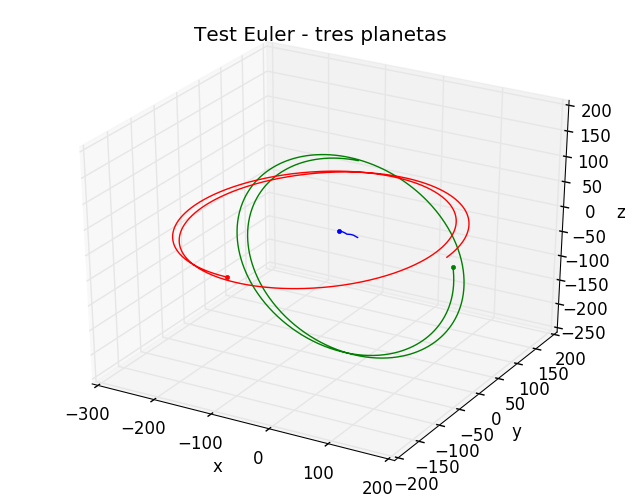

In [696]:
#Test Euler
lista=moverEuler(planetas,700)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Euler - tres planetas");

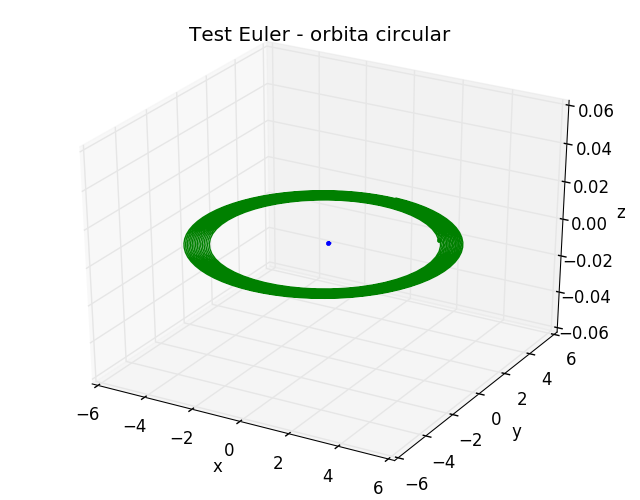

In [697]:
#orbita circular
lista=moverEuler(circulo,1000,.1)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Euler - orbita circular");

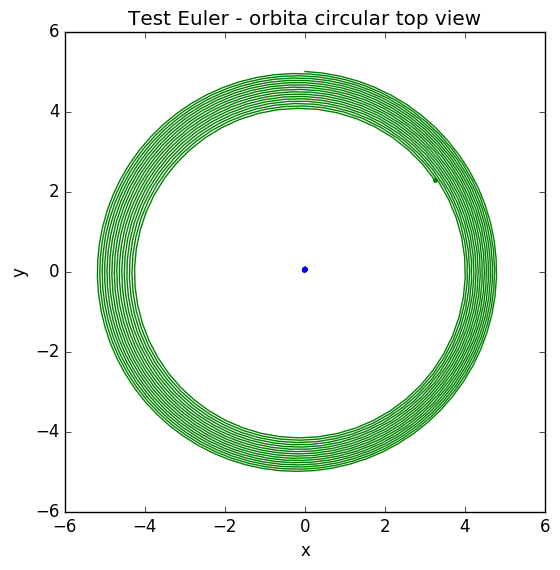

In [698]:
#Circular visto desde arriba
lista=moverEuler(circulo,1000,.1)
using PyPlot
for i=1:length(lista)
    plot(lista[i][1],lista[i][2],marker=".",markevery=[length(lista[i][1])-1])
end
axis("scaled")
xlabel("x")
ylabel("y")
title("Test Euler - orbita circular top view");

Podemos ver que hay un problema, va perdiendo energia

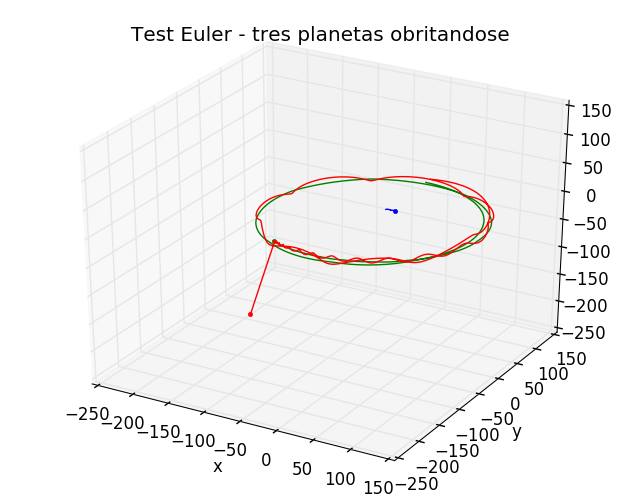

In [715]:
#tres planetas obritandose
lista=moverEuler(tres,3900,.1)
using PyPlot
max=0
min=0
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
    
    for ii=1:3
        extrema(lista[i][ii])
        if(extrema(lista[i][ii])[1]<min)
            min=extrema(lista[i][ii])[1]
        end
        if(extrema(lista[i][ii])[2]>max)
            max=extrema(lista[i][ii])[2]
        end
    end
end
plot3D([min],[min],[min])
plot3D([max],[max],[max])
xlabel("x")
ylabel("y")
title("Test Euler - tres planetas obritandose");

Vemos que no es una obrita estable

In [494]:
#Integracion Usando Runga Kutta 4
function moverRunge(planets1,steps=2000,h=1,resolucion=10000) #funcion principal que va a hacer los calculos
    planets=deepcopy(planets1)
    # saveN es el numero de steps que guardara para hacer la grafica,
    # de modo que no tengas que guardar cada step porque gasta mucha memoria
    saveN=round(Int,steps/resolucion)+1
    iN=1
    
    # esto crea un array para cada planetsa en la lista, es para guardar las posiciones en cada tiempo
    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end
    for i=1:length(planets)
        #esto es para guardar las posiciones "x,y,z" actuales de los planetsas antes de ir al siguiente step de tiempo, de modo que podamos graficar la trayectoria
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])
    end

    #esto crea un array para guardar los 4 steps de Runge para cada planetsa
    KvKr=Array(Array,4)
    KvKr[1]=Array(Array,0)
    KvKr[2]=Array(Array,0)
    KvKr[3]=Array(Array,0)
    KvKr[4]=Array(Array,0)
    for i=1:length(planets)
        for ii=1:4
            array=zeros(Number,6)
            push!(KvKr[ii],array)
        end
    end

    A=[0,h/2,h/2,h/1]


    for fr=1:steps
        for k=1:4
            for i=1:length(planets)
                for ii=1:length(planets)
                    if(i!=ii)
                        if(k>1)
                            rx=(planets[ii][1]+((A[k])*(KvKr[k-1][ii][1])))-(planets[i][1]+((A[k])*(KvKr[k-1][i][1])));
                            ry=(planets[ii][2]+((A[k])*(KvKr[k-1][ii][2])))-(planets[i][2]+((A[k])*(KvKr[k-1][i][2])));
                            rz=(planets[ii][3]+((A[k])*(KvKr[k-1][ii][3])))-(planets[i][3]+((A[k])*(KvKr[k-1][i][3])));
                        else
                            rx=planets[ii][1]-planets[i][1];
                            ry=planets[ii][2]-planets[i][2];
                            rz=planets[ii][3]-planets[i][3];
                        end


                        r2=(rx*rx)+(ry*ry)+(rz*rz);
                        r=sqrt(r2);
                        a=(planets[ii][7])/(r2);

                        ax=a*(rx/r);
                        ay=a*(ry/r);
                        az=a*(rz/r);

                        KvKr[k][i][4]+=ax;
                        KvKr[k][i][5]+=ay;
                        KvKr[k][i][6]+=az;
                    end
                end
                if(k>1)
                    KvKr[k][i][1]+=planets[i][4]+((A[k])*(KvKr[k-1][i][4]));
                    KvKr[k][i][2]+=planets[i][5]+((A[k])*(KvKr[k-1][i][5]));
                    KvKr[k][i][3]+=planets[i][6]+((A[k])*(KvKr[k-1][i][6]));
                else
                    KvKr[k][i][1]+=planets[i][4];
                    KvKr[k][i][2]+=planets[i][5];
                    KvKr[k][i][3]+=planets[i][6];
                end
            end
        end


        for i=1:length(planets)


        planets[i][1]+=((h/6)*(KvKr[1][i][1]+2*KvKr[2][i][1]+2*KvKr[3][i][1]+KvKr[4][i][1]));
        planets[i][2]+=((h/6)*(KvKr[1][i][2]+2*KvKr[2][i][2]+2*KvKr[3][i][2]+KvKr[4][i][2]));
        planets[i][3]+=((h/6)*(KvKr[1][i][3]+2*KvKr[2][i][3]+2*KvKr[3][i][3]+KvKr[4][i][3]));

        planets[i][4]+=((h/6)*(KvKr[1][i][4]+2*KvKr[2][i][4]+2*KvKr[3][i][4]+KvKr[4][i][4]));
        planets[i][5]+=((h/6)*(KvKr[1][i][5]+2*KvKr[2][i][5]+2*KvKr[3][i][5]+KvKr[4][i][5]));
        planets[i][6]+=((h/6)*(KvKr[1][i][6]+2*KvKr[2][i][6]+2*KvKr[3][i][6]+KvKr[4][i][6]));
        end

        if(fr==saveN*iN)
            iN+=1
            for i=1:length(planets)
                push!(lista[i][1],planets[i][1])
                push!(lista[i][2],planets[i][2])
                push!(lista[i][3],planets[i][3])
            end
        end
        for i=1:4
            for ii=1:length(planets)
                for iii=1:6
                    KvKr[i][ii][iii]=0;
                end
            end
        end
            
    end
lista
end

moverRunge (generic function with 4 methods)

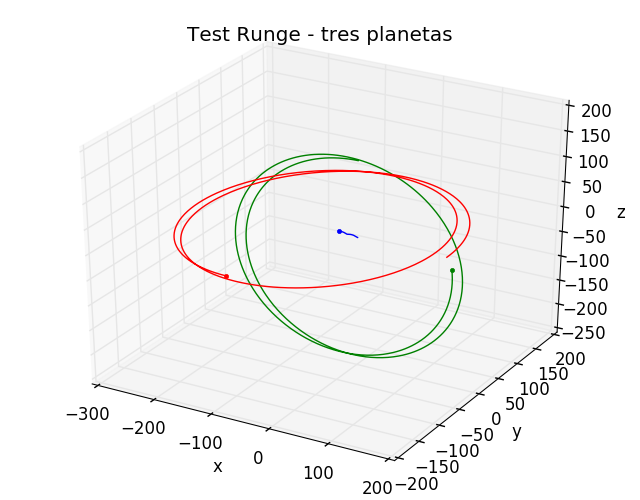

In [727]:
#Test Runge
lista=moverRunge(planetas,700)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Runge - tres planetas");

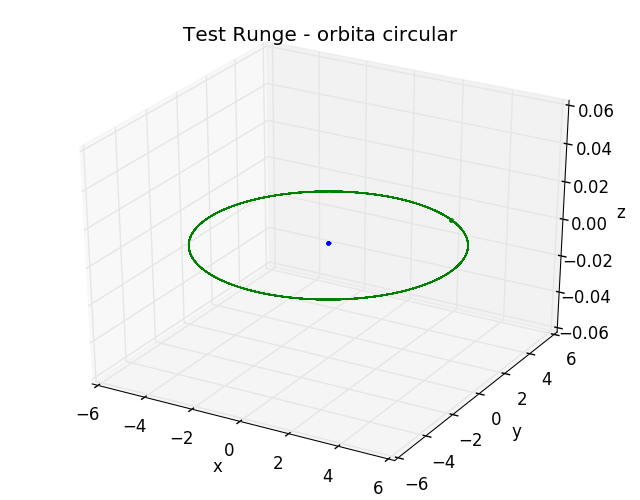

In [726]:
#orbita circular
lista=moverRunge(circulo,1000,.1)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Runge - orbita circular");

Esta funciona mucho mejor que la anterior

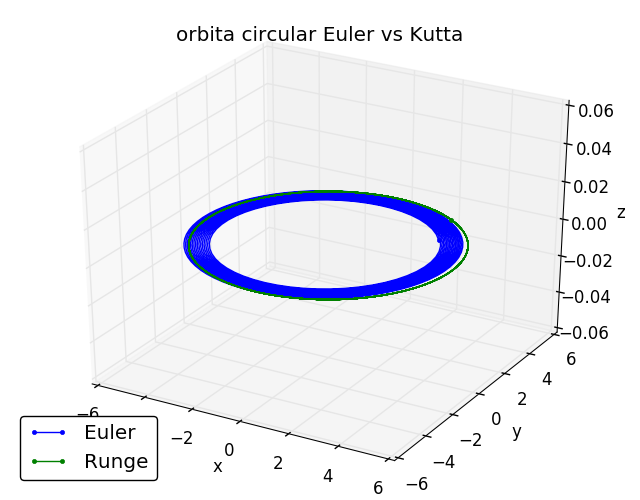

In [724]:
#orbita circular Euler vs Kutta

lista=moverEuler(circulo,1000,.1)
plot3D(lista[2][1],lista[2][2],lista[2][3],marker=".",markevery=[length(lista[2][1])-1],label="Euler")

lista=moverRunge(circulo,1000,.1)
plot3D(lista[2][1],lista[2][2],lista[2][3],marker=".",markevery=[length(lista[2][1])-1],label="Runge")


legend(loc="lower left",fancybox="true")
xlabel("x")
ylabel("y")
zlabel("z")
title("orbita circular Euler vs Kutta");

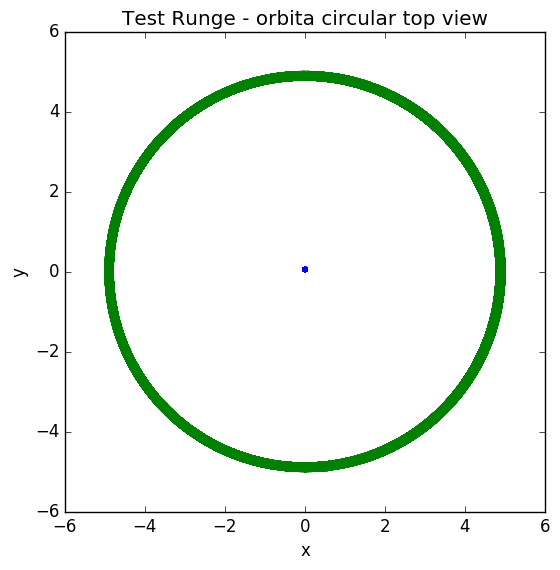

In [735]:
# Mucho tiempo
lista=moverRunge(circulo,500000,.1,50000*2)
using PyPlot
for i=1:length(lista)
    plot(lista[i][1],lista[i][2],marker=".",markevery=[length(lista[i][1])-1])
end
axis("scaled")
xlabel("x")
ylabel("y")
title("Test Runge - orbita circular top view");

sin embargo eventualmente tambien da problemas

In [566]:
#Verlet Velocity integracion con energia estable
function moverVerletV(planets1,steps=2000,h=1,resolucion=10000) #funcion principal que va a hacer los calculos
    planets=deepcopy(planets1)
    
    for i=1:length(planets)
        push!(planets[i],0)
        push!(planets[i],0)
        push!(planets[i],0)
    end
    
    # saveN es el numero de steps que guardara para hacer la grafica,
    # de modo que no tengas que guardar cada step porque gasta mucha memoria
    saveN=round(Int,steps/resolucion)+1
    iN=1
    
    # esto crea un array para cada planeta en la lista, es para guardar las posiciones en cada tiempo
    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end
    for i=1:length(planets)
        #esto es para guardar las posiciones "x,y,z" actuales de los planetas antes de ir al siguiente step de tiempo, de modo que podamos graficar la trayectoria
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])
    end
    
    #verlet usa posicion en lugar de velocidad asi que hay que calcular el primer step con otro metodo
    for i=1:length(planets)
        axt=0
        ayt=0
        azt=0
        for ii=1:length(planets) # estos dos "for" se usaran para sacar la fuerza de cada planeta contra cada otro planeta
            if(i!=ii)#esto es para que un planeta no se cuente contra si mismo

                #lo que sigue es obtener la fuerza de atraccion: F=G*(m1*m2)/(r^2)

                rx=planets[ii][1]-planets[i][1] #esta es la componente x del vector de la distancia entre un planeta y el otro
                ry=planets[ii][2]-planets[i][2]
                rz=planets[ii][3]-planets[i][3]

                r2=(rx*rx)+(ry*ry)+(rz*rz) #esto es al distancia al cuadrado: d=r^2=sqrt(rx^2+ry^2+rx^z)^2
                r=sqrt(r2) #esto es la distancia: r
                a=(planets[ii][7])/(r2) #esto es la fuerza ya multiplicada por la masa para sacar la aceleracion: F=ma -> a=G*m2/(r^2)


                #esta parte es para encontrar las componentes x,y,z de la aceleracion,
                # "a" es la magnitud y la dirrecion es igual a la del vector rx,ry,rz que teniamos
                p=a/(r)
                ax=p*rx
                ay=p*ry
                az=p*rz

                axt+=ax #vx: la nueva velocidad es igual a la velocidad que ya tenia mas la aceleracion a=cambio de velocida por unidad de tiempo 
                ayt+=ay
                azt+=az
            end
        end
        
        planets[i][8]=axt
        planets[i][9]=ayt
        planets[i][10]=azt
        
        planets[i][4]+=axt*(h)
        planets[i][5]+=ayt*(h)
        planets[i][6]+=azt*(h)

        planets[i][1]+=planets[i][4]*(h)
        planets[i][2]+=planets[i][5]*(h)
        planets[i][3]+=planets[i][6]*(h)
        
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])        
    end
    

    for fr=1:steps #estos son los steps de tiempo para los cuales calcularemos la poscion de cada planeta
        for i=1:length(planets)
            planets[i][1]+=planets[i][4]*h+.5*planets[i][8]*h*h
            planets[i][2]+=planets[i][5]*h+.5*planets[i][9]*h*h
            planets[i][3]+=planets[i][6]*h+.5*planets[i][10]*h*h
        end
        for i=1:length(planets)
            axt=0
            ayt=0
            azt=0
            for ii=1:length(planets) # estos dos "for" se usaran para sacar la fuerza de cada planeta contra cada otro planeta
                if(i!=ii)#esto es para que un planeta no se cuente contra si mismo

                    #lo que sigue es obtener la fuerza de atraccion: F=G*(m1*m2)/(r^2)

                    rx=planets[ii][1]-planets[i][1] #esta es la componente x del vector de la distancia entre un planeta y el otro
                    ry=planets[ii][2]-planets[i][2]
                    rz=planets[ii][3]-planets[i][3]

                    r2=(rx*rx)+(ry*ry)+(rz*rz) #esto es al distancia al cuadrado: d=r^2=sqrt(rx^2+ry^2+rx^z)^2
                    r=sqrt(r2) #esto es la distancia: r
                    a=(planets[ii][7])/(r2) #esto es la fuerza ya multiplicada por la masa para sacar la aceleracion: F=ma -> a=G*m2/(r^2)
                    
                    
                    #esta parte es para encontrar las componentes x,y,z de la aceleracion,
                    # "a" es la magnitud y la dirrecion es igual a la del vector rx,ry,rz que teniamos
                    p=a/(r)
                    ax=p*rx
                    ay=p*ry
                    az=p*rz

                    axt+=ax #vx: la nueva velocidad es igual a la velocidad que ya tenia mas la aceleracion a=cambio de velocida por unidad de tiempo 
                    ayt+=ay
                    azt+=az
                end
            end
            axp=planets[i][8]
            ayp=planets[i][9]
            azp=planets[i][10]

            planets[i][8]=axt
            planets[i][9]=ayt
            planets[i][10]=azt

            planets[i][4]+=.5*(axp+axt)*h
            planets[i][5]+=.5*(ayp+ayt)*h
            planets[i][6]+=.5*(azp+azt)*h
        end
        if(fr==saveN*iN)
            iN+=1
            for i=1:length(planets)
                #esto es para guardar las posiciones "x,y,z" actuales de los planetas antes de ir al siguiente step de tiempo, de modo que podamos graficar la trayectoria
                push!(lista[i][1],planets[i][1])
                push!(lista[i][2],planets[i][2])
                push!(lista[i][3],planets[i][3])
            end
        end
    end
    lista
end

moverVerletV (generic function with 4 methods)

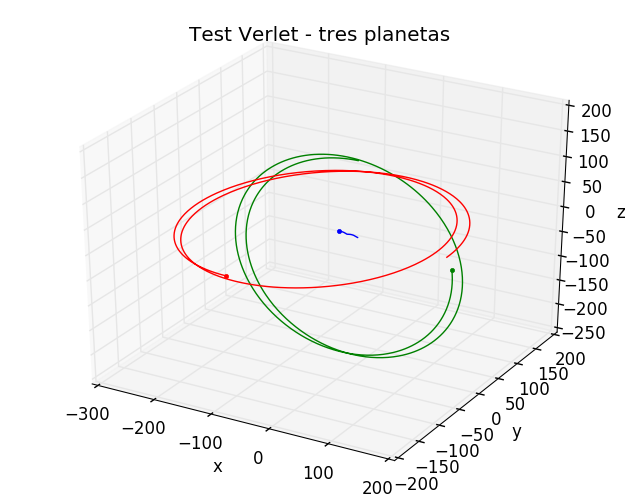

In [736]:
#La probamos, parece estar en orden
lista=moverRunge(planetas,700)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
end
xlabel("x")
ylabel("y")
zlabel("z")
title("Test Verlet - tres planetas");

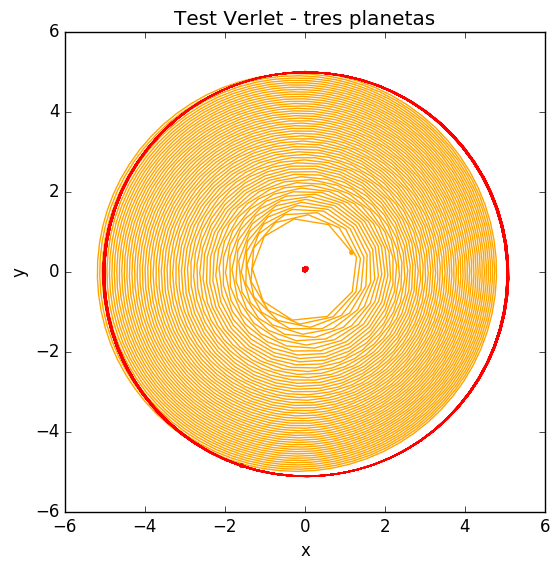

In [737]:
lista=moverEuler(circulo,2200,.1)
using PyPlot
for i=1:length(lista)
    plot(lista[i][1],lista[i][2],marker=".",markevery=[length(lista[i][1])-1],color="orange")
end
axis("scaled")

lista=moverVerletV(circulo,2200,.1)
using PyPlot
for i=1:length(lista)
    plot(lista[i][1],lista[i][2],marker=".",markevery=[length(lista[i][1])-1],color="red")
end
axis("scaled")
xlabel("x")
ylabel("y")
title("Verlet vs Euler");

In [632]:
#Medidor energya Energia
ps=circulo
steps=500
h=.1
lista=moverEuler(ps,steps,h,steps*2)
function energy(ps,steps,h,lble="-")
    EP=Array(Number,0)
    EC=Array(Number,0)
    E=Array(Number,0)
    R=Array(Number,0)
    E0=0
    for t=3:steps
        ep=0
        ec=0
        for i=1:length(lista)
            rx=lista[i][1][t-1]-lista[i][1][t]
            ry=lista[i][2][t-1]-lista[i][2][t]
            rz=lista[i][3][t-1]-lista[i][3][t]

            r=sqrt((rx*rx)+(ry*ry)+(rz*rz))
            v=r/h


            ec+=(1/2)*ps[i][7]*v*v

            for ii=i+1:length(lista)
                rx=lista[ii][1][t]-lista[i][1][t]
                ry=lista[ii][2][t]-lista[i][2][t]
                rz=lista[ii][3][t]-lista[i][3][t]

                r2=(rx*rx)+(ry*ry)+(rz*rz)
                r=sqrt(r2)

                ep-=ps[i][7]*ps[ii][7]/r
            end
        end
        if(t==3)
            E0=ep+ec
        end
        push!(EP,ep)
        push!(EC,ec)
        push!(E,E0/(ep+ec))
    end
    plot(1:steps-2,E,label=lble)
end

energy (generic function with 2 methods)

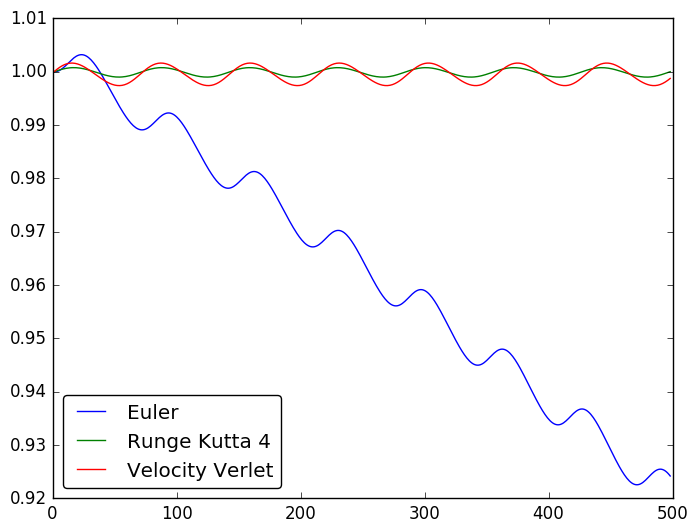

PyObject <matplotlib.legend.Legend object at 0x0000000040562940>

In [638]:
ps=circulo
steps=500
h=.1
lista=moverEuler(ps,steps,h,steps*2)
energy(ps,steps,h,"Euler")
lista=moverRunge(ps,steps,h,steps*2)
energy(ps,steps,h,"Runge Kutta 4")
lista=moverVerletV(ps,steps,h,steps*2)
energy(ps,steps,h,"Velocity Verlet")
legend(loc="lower left",fancybox="true");

Podemos ver como la energia de Euler va callendo, mintras que la de runge y verlet oscilan

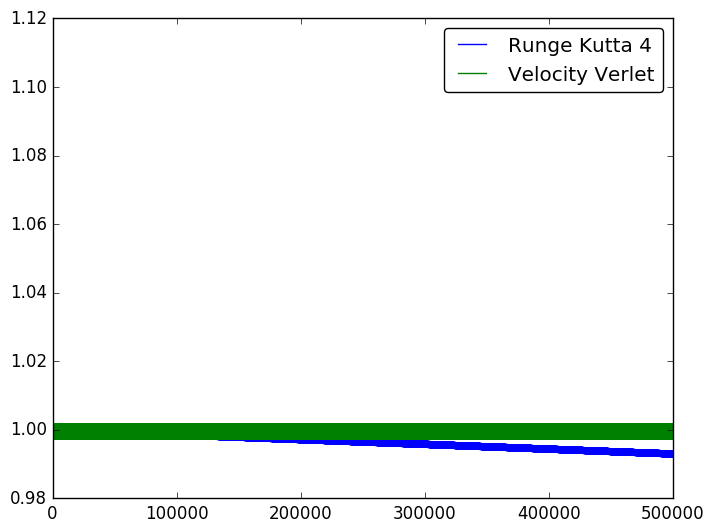

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000003C7925C0>

In [749]:
ps=circulo
steps=500000
h=.1
lista=moverRunge(ps,steps,h,steps*2)
energy(ps,steps,h,"Runge Kutta 4")
lista=moverVerletV(ps,steps,h,steps*2)
energy(ps,steps,h,"Velocity Verlet")
legend(loc="uper left",fancybox="true")
plot([0],[1.1])

si lo corremos un largo tiempo vemos que runge tambien va callendo pero verlet es estable

In [766]:
#Test de estabilidad--- esta es una funcion que modifica la poscicion y velocidad de un planeta en un sistema para encontrar un sistema mas estable
function estable(planets1,steps=2000,h=1,p1=3,p2=2,maxiterations=3,range=2) #funcion principal que va a hacer los calculos
    planets=deepcopy(planets1)
    
    # esto crea un array para cada planeta en la lista, es para guardar las posiciones en cada tiempo
    lista=Array(Array,0)
    for i=1:length(planets)
        array=Array(Array,3)
        push!(lista,array)
        array[1]=Array(Number,0)
        array[2]=Array(Number,0)
        array[3]=Array(Number,0)
    end
    for i=1:length(planets)
        #esto es para guardar las posiciones "x,y,z" actuales de los planetas antes de ir al siguiente step de tiempo, de modo que podamos graficar la trayectoria
        push!(lista[i][1],planets[i][1])
        push!(lista[i][2],planets[i][2])
        push!(lista[i][3],planets[i][3])
    end
    
    for i=1:length(planets)
        #verlen usa posicion en lugar de velocidad
        ix=planets[i][1]
        iy=planets[i][2]
        iz=planets[i][3]
        planets[i][1]+=planets[i][4]*h
        planets[i][2]+=planets[i][5]*h
        planets[i][3]+=planets[i][6]*h
        planets[i][4]=ix
        planets[i][5]=iy
        planets[i][6]=iz
    end
    
    maxtime=0
    x0=sqrt((planets[p1][1]^2)+(planets[p1][2]^2)+(planets[p1][3]^2))
    d0=sqrt(((planets[p2][1]-planets[p1][1])^2)+((planets[p2][2]-planets[p1][2])^2)+((planets[p2][3]-planets[p1][3])^2))
    x1=0
    d1=0
    print("Current\n\tcenter distance: ",x0,"\tplanet distance: ",d0,"\n")
    print("Limit\n\tcenter distance: ",x0*range,"\tplanet distance: ",d0*range,"\n\n")
    
    px=0
    py=0
    pz=0
    pvx=0
    pvy=0
    pvz=0
    nx=0
    ny=0
    nz=0
    nvx=0
    nvy=0
    nvz=0
    
    rrr=100
    function ran()
        if(rand()<.5)
            rand()*10
        else
            -rand()*10
        end
    end    

    
    success=true
    fr=0
    iterations=0
    while fr<steps #estos son los steps de tiempo para los cuales calcularemos la poscion de cada planeta
        fr+=1
        for i=1:length(planets)
            axt=0;
            ayt=0;
            azt=0;
            for ii=1:length(planets) # estos dos "for" se usaran para sacar la fuerza de cada planeta contra cada otro planeta
                if(i!=ii)#esto es para que un planeta no se cuente contra si mismo

                    #lo que sigue es obtener la fuerza de atraccion: F=G*(m1*m2)/(r^2)

                    rx=planets[ii][1]-planets[i][1] #esta es la componente x del vector de la distancia entre un planeta y el otro
                    ry=planets[ii][2]-planets[i][2]
                    rz=planets[ii][3]-planets[i][3]

                    r2=(rx*rx)+(ry*ry)+(rz*rz) #esto es al distancia al cuadrado: d=r^2=sqrt(rx^2+ry^2+rx^z)^2
                    r=sqrt(r2) #esto es la distancia: r
                    a=(planets[ii][7])/(r2) #esto es la fuerza ya multiplicada por la masa para sacar la aceleracion: F=ma -> a=G*m2/(r^2)
                    
                    
                    #esta parte es para encontrar las componentes x,y,z de la aceleracion,
                    # "a" es la magnitud y la dirrecion es igual a la del vector rx,ry,rz que teniamos
                    p=a/(r)
                    ax=p*rx
                    ay=p*ry
                    az=p*rz

                    axt+=ax #vx: la nueva velocidad es igual a la velocidad que ya tenia mas la aceleracion a=cambio de velocida por unidad de tiempo 
                    ayt+=ay
                    azt+=az
                end
            end
            xp=planets[i][4]
            yp=planets[i][5]
            zp=planets[i][6]
            
            planets[i][4]=planets[i][1]
            planets[i][5]=planets[i][2]
            planets[i][6]=planets[i][3]
    
            planets[i][1]=axt*h*h+2*planets[i][1]-xp
            planets[i][2]=ayt*h*h+2*planets[i][2]-yp
            planets[i][3]=azt*h*h+2*planets[i][3]-zp
        end
        
        x1=sqrt((planets[p1][1]^2)+(planets[p1][2]^2)+(planets[p1][3]^2))
        d1=sqrt(((planets[p2][1]-planets[p1][1])^2)+((planets[p2][2]-planets[p1][2])^2)+((planets[p2][3]-planets[p1][3])^2))
        if(x1>x0*range || d1>d0*(range)) 
            iterations+=1
            #reset planets
            planets=deepcopy(planets1)
            

            
            if(fr>maxtime)
                maxtime=fr
                ptime=maxtime
                px=nx
                py=ny
                pz=nz
                pvx=nvx
                pvy=nvy
                pvz=nvz
                print("Current: ",iterations,"\n")
                print(px," ",py," ",pz,"\n")
                print(pvx," ",pvy," ",pvz,"\n")
            end
            
            nx=px+(ran()/rrr)
            ny=py+(ran()/rrr)
            nz=pz+(ran()/rrr)
            nvx=pvx+(ran()/rrr)
            nvy=pvy+(ran()/rrr)
            nvz=pvz+(ran()/rrr)
            
            
            planets[p1][1]+=nx
            planets[p1][2]+=ny
            planets[p1][3]+=nz
            planets[p1][4]+=nvx
            planets[p1][5]+=nvy
            planets[p1][6]+=nvz
            
            
            #velocidad vs pocision en verlen
            for i=1:length(planets)
                ix=planets[i][1]
                iy=planets[i][2]
                iz=planets[i][3]
                planets[i][1]+=planets[i][4]*h
                planets[i][2]+=planets[i][5]*h
                planets[i][3]+=planets[i][6]*h
                planets[i][4]=ix
                planets[i][5]=iy
                planets[i][6]=iz
            end
                    
            #reset frame and add iteration
            if(iterations>maxiterations)
                success=false
                fr=steps
            else
                fr=0
            end
            
            
        end
    end
    lista
    print("\nFinal: ",iterations,"\n")
    
    print("[")
    print(planets1[p1][1]+px,",")
    print(planets1[p1][2]+py,",")
    print(planets1[p1][3]+pz,",")
    print(planets1[p1][4]+pvx,",")
    print(planets1[p1][5]+pvy,",")
    print(planets1[p1][6]+pvz,",")
    print(planets1[p1][7])
    print("]")
    if(success)
        print("\n\n\nSuccess: stable for ",steps,"steps.\n\n")
    else
        print("\n\n\nProgram stoped befor finding a stable solution.\n\n")
    end
    
    print("Final distance: ",d1)
end

estable (generic function with 7 methods)

In [767]:
#veamos de nuevo nuestro sistema de tres planetas orbitando
tres = (
[0,0,0,-0.001,0,0,2000],
[0,100,0,sqrt(2000/100)+.54,0,0,11],
[0,112,0,sqrt(2000/100)+.9,-.02,.82,1]
)

([0.0,0.0,0.0,-0.001,0.0,0.0,2000.0],[0.0,100.0,0.0,5.01213595499958,0.0,0.0,11.0],[0.0,112.0,0.0,5.37213595499958,-0.02,0.82,1.0])

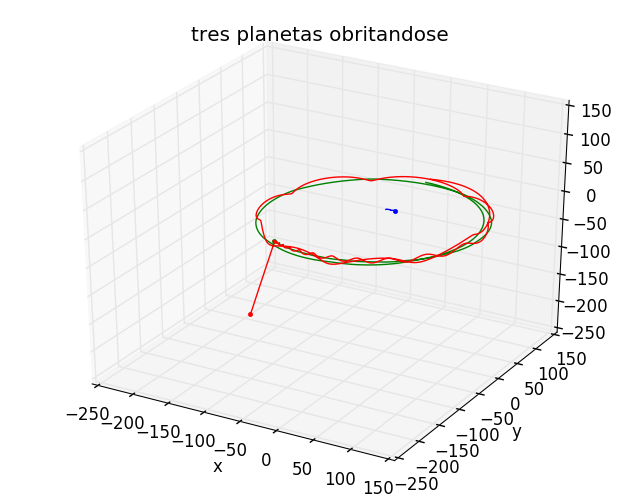

In [752]:
#grafica de tres planetas obritandose
lista=moverEuler(tres,3900,.1)
using PyPlot
max=0
min=0
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
    
    for ii=1:3
        extrema(lista[i][ii])
        if(extrema(lista[i][ii])[1]<min)
            min=extrema(lista[i][ii])[1]
        end
        if(extrema(lista[i][ii])[2]>max)
            max=extrema(lista[i][ii])[2]
        end
    end
end
plot3D([min],[min],[min])
plot3D([max],[max],[max])
xlabel("x")
ylabel("y")
title("tres planetas obritandose");

vemos que la orbita no es estable, ahora probemos la funcion que busca una orbita mas estable

In [769]:
#busca una orbita que sea estable durante 10000 steps, y hace 300 iteraciones, modificando solamente la tercera particula
estable(tres,10000,.1,3,2,300,2);

Current
	center distance: 111.99931841956536	planet distance: 11.998334217715394
Limit
	center distance: 223.9986368391307	planet distance: 23.996668435430788

Current: 1
0 0 0
0 0 0
Current: 7
-0.027423034686416537 0.008456186960457957 0.06990494791546156
0.01434459795120029 -0.0031870906923596952 0.0029867075678968293
Current: 10
-0.09064313137063622 -0.08256715280771958 0.12382698240547883
-0.01933594504736946 0.026280514307337934 0.041782928560243064
Current: 42
-0.08204459041156106 0.0038804759717258747 0.17608138153975342
0.020734087766579767 -0.004428753846932528 0.027673622766649978
Current: 55
-0.040731575771210685 -0.03827084537855918 0.14968373687518552
-0.0204596490108095 0.029726312715947816 0.04244462503635338
Current: 67
-0.02347044790251346 0.011499385023298767 0.16198755798747158
0.039345961257129414 0.04311168865862559 -0.03578573273393046

Final: 72
[-0.02347044790251346,112.0114993850233,0.16198755798747158,5.41148191625671,0.023111688658625586,0.7842142672660695,1.

In [770]:
#al final nos da las coordenadas modificadas de la tercera particula
tres = (
[0,0,0,-0.001,0,0,2000],
[0,100,0,sqrt(2000/100)+.54,0,0,11],
[-0.02347044790251346,112.0114993850233,0.16198755798747158,5.41148191625671,0.023111688658625586,0.7842142672660695,1.0]
)

([0.0,0.0,0.0,-0.001,0.0,0.0,2000.0],[0.0,100.0,0.0,5.01213595499958,0.0,0.0,11.0],[-0.02347044790251346,112.0114993850233,0.16198755798747158,5.41148191625671,0.023111688658625586,0.7842142672660695,1.0])

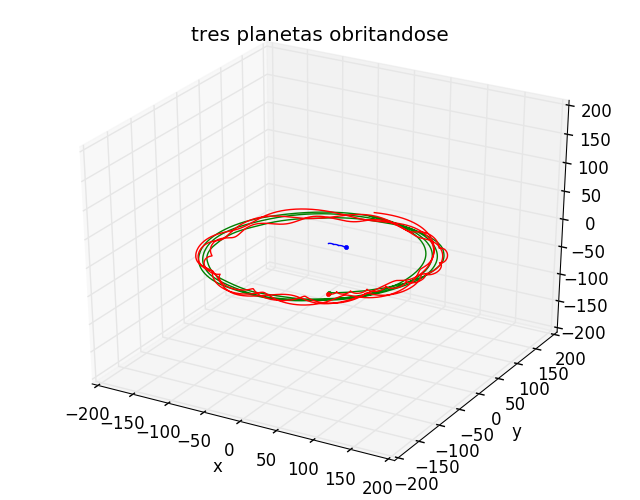

In [774]:
#grafica
lista=moverEuler(tres,8100,.1)
using PyPlot
max=0
min=0
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],marker=".",markevery=[length(lista[i][1])-1])
    
    for ii=1:3
        extrema(lista[i][ii])
        if(extrema(lista[i][ii])[1]<min)
            min=extrema(lista[i][ii])[1]
        end
        if(extrema(lista[i][ii])[2]>max)
            max=extrema(lista[i][ii])[2]
        end
    end
end
plot3D([min],[min],[min])
plot3D([max],[max],[max])
xlabel("x")
ylabel("y")
title("tres planetas obritandose");

veos que ahora el sistema es estable a un tiempo mayor

In [775]:
# y para terminar vamos a simluar los planetas interiores del sistema solar
SistemaSolar=(
[5.628055933511824E+05,3.411843693775460E+05,-2.436386981035113E+04,
    -7.291599363100120E-04,1.210708994860029E-02,-1.869664697214633E-06,
    1.3271244004193938e+11,"Sol"
],
[-5.114900970348819E+07,-4.060852024612986E+07,1.373753734754255E+06,
    2.027956942186843E+01,-3.600051303471849E+01,-4.803191913645168E+00,
    22032.09,"Mercury"
],
[9.854679342419721E+07,4.646197811407988E+07,-5.046280202213528E+06,
    -1.502715063408101E+01,3.154566133521156E+01,1.299473506881935E+00,
    324858.63,"Venus"
],
[-1.048872226277378E+08,-1.076353288430656E+08,-1.961730794146657E+04,
    2.083297782408464E+01,-2.092328512963567E+01,1.528554128359616E-03,
    398600.440,"Earth"
],
[-1.045914151109089E+08,-1.074351546688744E+08,-4.175107901339978E+04,
    2.021104671033281E+01,-2.001895526099204E+01,-6.854614438420903E-02,
    4902.798,"Moon"    
],
[-1.381194575492661E+08,-1.841909714269926E+08,-4.877476766278595E+05,
    2.027889587634121E+01,-1.246818497418936E+01,-7.592524395983373E-01,
    42828.3,"Mars"
    ]
);

esa info la saque de aqui http://ssd.jpl.nasa.gov/horizons.cgi pero no parece funcionar, creo que porque los numeros son muy grandes y el metodo de integracion es muy inexacto, talvez usando otras unidades mas naturales que no fueran km,s,Kg

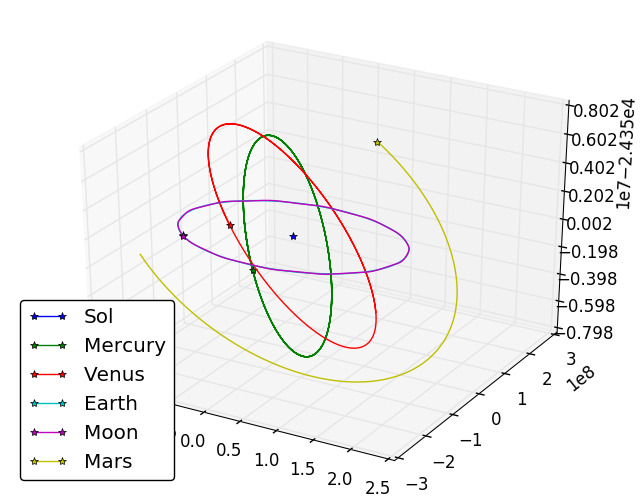

PyObject <matplotlib.legend.Legend object at 0x000000003C100BA8>

In [779]:
# ta dah! aunque la direccion de las velocidades esta mal
lista=moverVerletV(SistemaSolar,360*24*60*60,1)
for i=1:length(lista)
    plot3D(lista[i][1],lista[i][2],lista[i][3],label=SistemaSolar[i][8],marker="*",markevery=[length(lista[i][1])-1])
end
legend(loc="lower left",fancybox="true")